In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import os
import sys
sys.path.append('../scripts')
import landcover_definitions as lc

from make_priors_chesapeake import condense_cc7_to_cc5_cooccurrance

In [15]:
CC_data_dir = "/home/esther/torchgeo_data/cvpr_chesapeake_landcover"

def unique_tile_ids_from_dir(data_dir_this):
    """Get tile ids from a provided data dir."""
    return np.unique([x[2:17] for x in os.listdir(data_dir_this)])


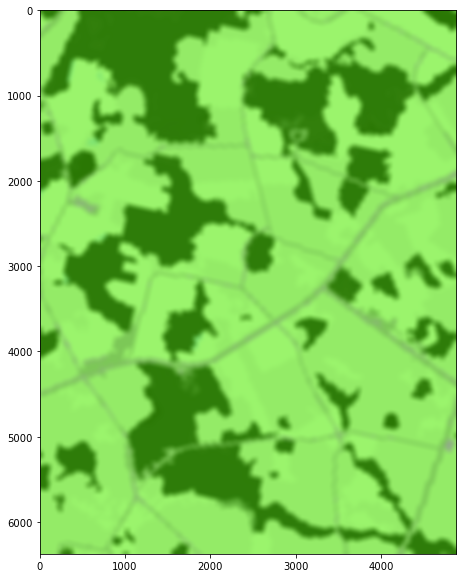

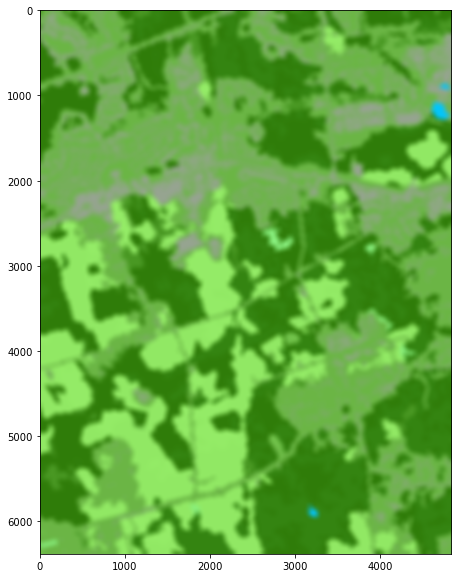

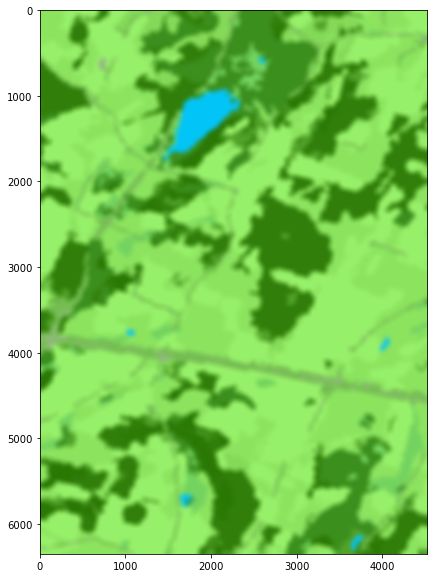

In [33]:
states_to_vis = ["de", "md", "ny"]#, "pa", "va", "wv"]
years = [2013, 2013, 2013]#, 2013, 2014, 2014]
set_to_viz = 'val'
    
idxs_viz = [1]
cooccurrence_mapping_matrices = {}
for state, year in zip(states_to_vis,years):
    
    dir_this_set = f'{CC_data_dir}/{state}_1m_{year}_extended-debuffered-{set_to_viz}_tiles'
    tiles_this_set = unique_tile_ids_from_dir(dir_this_set)
        
    for idx_viz in idxs_viz:
         
        prior_fp = f'{dir_this_set}/m_{tiles_this_set[idx_viz]}_prior_from_cooccurrences_101_31_no_osm_no_buildings.tif'
    
        with rasterio.open(prior_fp) as f:
            prior = f.read()
            
        fig, ax = plt.subplots(figsize=(10,10))
        ax.imshow(lc.vis_lc(prior, lc_type='chesapeake_4_no_zeros').T.swapaxes(0,1))
